In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @ 

In [24]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
import yfinance as yf

# Create a ticker object for Tesla with the ticker symbol 'TSLA'
tsla = yf.Ticker('TSLA')
tsla_data = tsla.history(period='max')
tsla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Extract the table with Tesla Revenue
tesla_revenue_table = soup.find_all("tbody")[1]

# Extract the table rows and columns
rows = tesla_revenue_table.find_all('tr')
tesla_revenue_data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    tesla_revenue_data.append(cols)

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=['Date', 'Revenue'])

# Clean the 'Revenue' column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.


In [10]:
import yfinance as yf

# Create a ticker object for GameStop with the ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# Extract stock information and save it in a dataframe named 'gme_data'
gme_data = gme_ticker.history(period='max')

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Extract the table with GameStop Revenue
gme_revenue_table = soup.find_all("tbody")[1]

# Extract the table rows and columns
rows = gme_revenue_table.find_all('tr')
gme_revenue_data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    gme_revenue_data.append(cols)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(gme_revenue_data, columns=['Date', 'Revenue'])

# Clean the 'Revenue' column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Display the last 5 rows of the DataFrame
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [26]:
make_graph(tsla_data, tesla_revenue, 'Tesla')

AttributeError: 'DataFrame' object has no attribute 'Date'

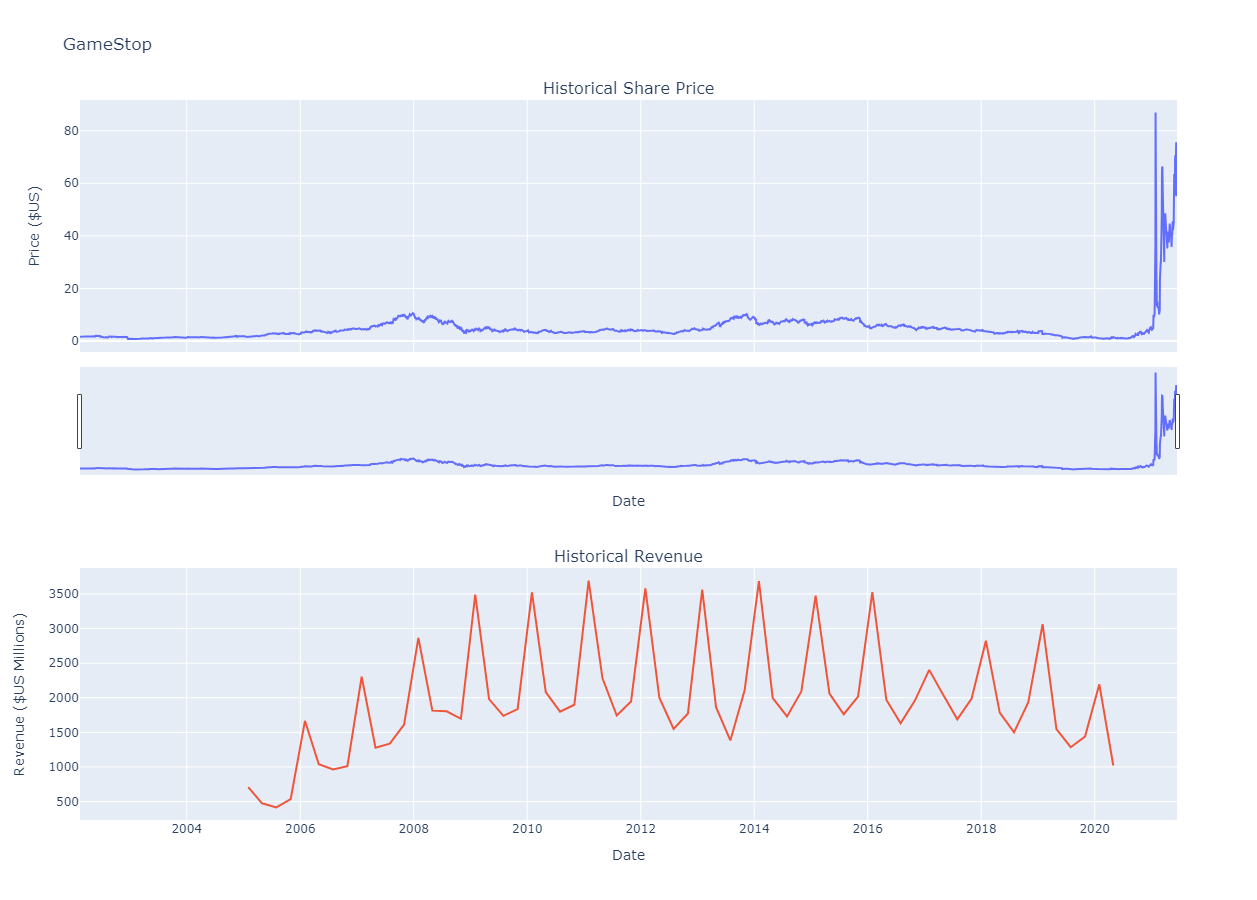

In [28]:
make_graph(gme_data, gme_revenue, 'GameStop')